In [1]:
import robin_stocks as r
import trading_algorithms as m 
import financial as f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import stockstats



KD formular 
current k=lastday K * 2/3 + current RSV * 1/3
where:
CP=Most recent closing price
L14=Lowest price of the 14 previous trading sessions
H14=Highest price of the same 14 previous trading
 sessions

%D = 100(H3/L3)
where:
H3=Highest of the three previous trading sessions
L3=Lowest price traded during the same three-day
  period

In [4]:
#calculate 30days ave move and 10 days ave move
#if 10days < 30 days ,trigger buy
tker = 'AAPL'
day = 20
X = f.requestHistoryStockPriceByDay(tker,day)
Data = pd.DataFrame(X)
Data = pd.concat([Data['date'][::-1],Data['open'][::-1],
                  Data['high'][::-1],Data['low'][::-1],
                  Data['close'][::-1],Data['volume'][::-1],
                  Data['adjClose'][::-1]],axis=1)
Data.columns = ['date','Open','High','Low','Close','Volume','adjClose']
Data = Data.reset_index(drop=True) #inverse the index number
Data

,date,Open,High,Low,Close,Volume,adjClose
0,2020-10-19,119.959999,120.419998,115.660004,115.980003,120639300.0,115.780251
1,2020-10-20,116.199997,118.980003,115.629997,117.510002,124423700.0,117.307617
2,2020-10-21,116.669998,118.709999,116.449997,116.870003,89946000.0,116.668724
3,2020-10-22,117.449997,118.040001,114.589996,115.750000,101988000.0,115.550644
4,2020-10-23,116.389999,116.550003,114.279999,115.040001,82572600.0,114.841873
5,2020-10-26,114.010002,116.550003,112.879997,115.050003,111850700.0,114.851852
6,2020-10-27,115.489998,117.279999,114.540001,116.599998,92276800.0,116.399178
7,2020-10-28,115.050003,115.430000,111.099998,111.199997,143937800.0,111.008476
8,2020-10-29,112.370003,116.930000,112.199997,115.320000,146129200.0,115.121384
9,2020-10-30,111.059998,111.989998,107.720001,108.860001,190272600.0,108.672516


In [5]:
#cal RSV
def cal_rsv(x,d=9):
    L = x['Close'].rolling(d).min()
    H = x['Close'].rolling(d).max()
    rsv = 100*(x['Close'] - L)/(H - L)
    rsv = rsv.fillna(0)#replace nan with 0
    x['rsv'] = rsv
    return x
#Cal KD
##current k=lastday K * 2/3 + current RSV * 1/3
def cal_kd_e(column):
    k=50.0
    param0 = 2/3
    param1 = 1/3
    #print(param0*k)
    for i in column * param1:
        k = param0*k + i
        yield k

#calculate kd
def cal_kd(x):
    x = cal_rsv(x)
    k = list(cal_kd_e(x['rsv']))
    x['k'] = k
    d = list(cal_kd_e(x['k']))
    x['d'] = d
    return x

Data = cal_kd(Data)
print(Data)   



          date        Open        High         Low       Close       Volume  \
0   2020-10-19  119.959999  120.419998  115.660004  115.980003  120639300.0   
1   2020-10-20  116.199997  118.980003  115.629997  117.510002  124423700.0   
2   2020-10-21  116.669998  118.709999  116.449997  116.870003   89946000.0   
3   2020-10-22  117.449997  118.040001  114.589996  115.750000  101988000.0   
4   2020-10-23  116.389999  116.550003  114.279999  115.040001   82572600.0   
5   2020-10-26  114.010002  116.550003  112.879997  115.050003  111850700.0   
6   2020-10-27  115.489998  117.279999  114.540001  116.599998   92276800.0   
7   2020-10-28  115.050003  115.430000  111.099998  111.199997  143937800.0   
8   2020-10-29  112.370003  116.930000  112.199997  115.320000  146129200.0   
9   2020-10-30  111.059998  111.989998  107.720001  108.860001  190272600.0   
10  2020-11-02  109.110001  110.680000  107.320000  108.769997  122866900.0   
11  2020-11-03  109.660004  111.489998  108.730003  

### visualization
#visualize the data
kd['d'].plot()
kd['k'].plot()

Text(0.5, 1.0, 'KD_modify')

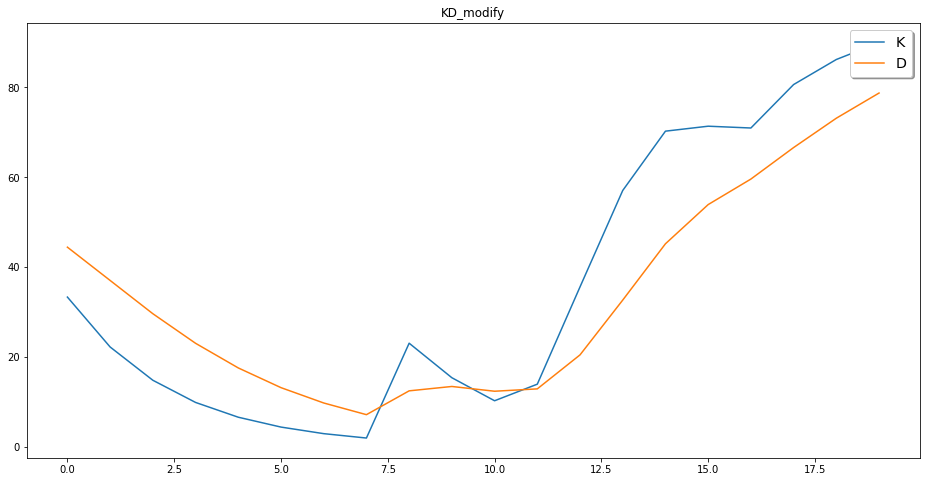

In [6]:
Data['k'].plot(figsize=(16,8), label='K')
Data['d'].plot(figsize=(16,8), label='D')
#Data['rsv'].plot(figsize=(16,8), label='RSV')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('KD_modify')


            close       kdjk       kdjd         rsv
date                                               
2020-10-19   7.10  33.333333  44.444444    0.000000
2020-10-20   7.18  36.257310  41.715400    0.000000
2020-10-21   7.08  25.686691  36.372497    0.000000
2020-10-22   7.17  32.275976  35.006990    0.000000
2020-10-23   7.23  42.850651  37.621544    0.000000
2020-10-26   7.14  40.471862  38.571650    0.000000
2020-10-27   7.11  35.314575  37.485958    0.000000
2020-10-28   6.98  25.394902  33.455606    0.000000
2020-10-29   7.10  31.929935  32.947049   48.000000
2020-10-30   7.09  35.453290  33.782462   44.000000
2020-11-02   7.24  50.302193  39.289039  100.000000
2020-11-03   7.29  63.616096  47.398058  100.000000
2020-11-04   7.26  63.016791  52.604303   90.322581
2020-11-05   7.39  70.496043  58.568216  100.000000
2020-11-06   7.22  65.179180  60.771871   58.536585
2020-11-09   7.25  61.485574  61.009772   65.853659
2020-11-10   7.61  73.384749  65.134764  100.000000
2020-11-11  

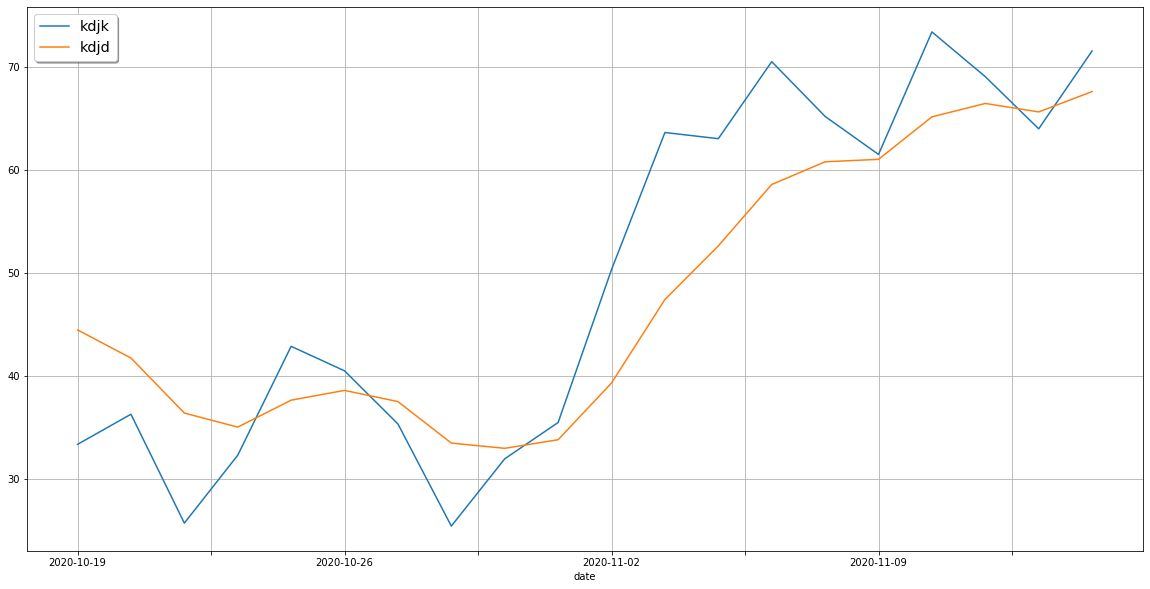

In [50]:
#using stockStat
stockStat = stockstats.StockDataFrame.retype(Data)
print(stockStat[['close','kdjk','kdjd','rsv']])
stockStat[['kdjk','kdjd'] # 分别是k d j 三个数据统计项。
         ].plot(subplots=False,figsize=(20,10), grid=True)
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

In [51]:
#find cross 
hist = stockStat['kdjk'] - stockStat['kdjd']
d_der = np.gradient(stockStat['kdjd'])
result = pd.DataFrame(d_der,columns=['d_der'])
result['histogram'] = hist.to_numpy()
result

,d_der,histogram
0,-2.729045,-11.111111
1,-4.035974,-5.458090
2,-3.354205,-10.685805
3,0.624523,-2.731014
4,1.782330,5.229107
5,-0.067793,1.900213
6,-2.558022,-2.171383
7,-2.269455,-8.060704
8,0.163428,-1.017114
9,3.170995,1.670827


In [52]:
#climbing theory 
#starting from looking for up trend and down trend 
current_value = 0
current_state = 0
state = []
hist = []
for value in result['histogram']:
    if value >= current_value:
        current_state = 1
    elif value < current_value:
        current_state = 0
    current_value = value
    state.append(current_state)
    hist.append(value)
result['state'] = state
result

,d_der,histogram,state
0,-2.729045,-11.111111,0
1,-4.035974,-5.458090,1
2,-3.354205,-10.685805,0
3,0.624523,-2.731014,1
4,1.782330,5.229107,1
5,-0.067793,1.900213,0
6,-2.558022,-2.171383,0
7,-2.269455,-8.060704,0
8,0.163428,-1.017114,1
9,3.170995,1.670827,1


In [53]:
#create window based on the distance    
def create_win(window, distance):
    new_win = []
    for item in window:
        new_win += [item]*distance
    return new_win

def filter_data_c(data, distance):
    win_zero = [0,1,0]
    win_one = [1,0,1]
    win_zero = create_win(win_zero, distance)
    win_one = create_win(win_one, distance)
    for i in range(len(data)):
        if i <  distance:
            next
        if i == len(data):
            break
        if data[i-distance:i+distance+1*distance] == win_one:
            for n in range(distance):
                data[i+n] = 1
        elif data[i-distance:i+distance+1*distance] == win_zero:
            for n in range(distance):
                data[i+n] = 0
    return data

def filter_data(state,distance):
    filtered = state
    for n in range(1,distance+1):
        filtered = filter_data_c(filtered,n)
    return filtered 

filtered = filter_data(state,1)

result['filtered'] = filtered
result['date'] = Data.index
result


,d_der,histogram,state,filtered,date
0,-2.729045,-11.111111,0,0,2020-10-19
1,-4.035974,-5.458090,1,0,2020-10-20
2,-3.354205,-10.685805,0,0,2020-10-21
3,0.624523,-2.731014,1,1,2020-10-22
4,1.782330,5.229107,1,1,2020-10-23
5,-0.067793,1.900213,0,0,2020-10-26
6,-2.558022,-2.171383,0,0,2020-10-27
7,-2.269455,-8.060704,0,0,2020-10-28
8,0.163428,-1.017114,1,1,2020-10-29
9,3.170995,1.670827,1,1,2020-10-30


In [54]:
#candidate requirements
#buy signal
#1. abs(histogram(i)) < 5
#2. state(i) = 1
#sell signal
#1. abs(histogram(i)) < 5
#2. state(i) = 0